In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours

import jax.numpy as jnp

In [3]:
# df = pd.read_csv("data/temp.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [4]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L


In [5]:
# formats = ["bfloat16", "fp4_e2m1", "float16", "fp16", "fp8_e5m2", "fp8_e4m3", "fp6_e3m2", "fp6_e2m3", "fp4", "int8", "int4"]

formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16"]

In [ ]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(5, 5, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for j, a_format in enumerate(formats):
            
            for loss_name in ["val_loss"]:
                ax = axs[i * len(formats) + j]
                print(f"w_format = {w_format}, a_format = {a_format}")

                # drop_df = df[df["data"] == data]
                try: 
                    drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")
                    # drop_df = df[(df["model.w_mx_format"] == w_format) & (df["model.a_mx_format"] == a_format)]
                
                    N, D, L = get_data(drop_df, loss_name)

                    params, _ = fit(N, D, L, kaplan=kaplan)
                    print(f"Loss: {params['loss']}")

                # df_big_data = df_big[(df_big["model.w_mx_format"] == w_format) & (df_big["model.a_mx_format"] == a_format)]
                # x = np.array(df_big_data["iso_flop"])
                # y = np.array(df_big_data["params"])
                # z = np.array(df_big_data["val_loss"])
                # extrapolation = (x,y,z)
                    extrapolation = None
                    masks = np.ones(5)
                    vals = np.zeros(5)
                    plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                # ax.set_title(f"{display_dict[data]}")
                    ax.set_title(f"{w_format}_{a_format}")

                    params["kaplan"] = kaplan
                    params["w_format"] = w_format
                    params["a_format"] = a_format
                # params["loss_name"] = val_map[data]
                    params = pd.DataFrame([params.values], columns=params.index, index = [i])
                    plot_params_df = pd.concat([plot_params_df, params])
                
                except: pass

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

w_format = fp6_e2m3, a_format = fp6_e2m3


Loss: 1.8478340513532693e-05
A = 4527423.929992861, B = 121014988.19576247, E = 0.5834257616357199, alpha = 0.5107687834455504, beta = 0.7619688034983187
G = 0.00016034273552434087, a = 0.5986849224182795, b = 0.40131507758172036
w_format = fp6_e2m3, a_format = fp6_e3m2
Loss: 1.178640250221853e-05
A = 2863963.1641027224, B = 94753066.04183452, E = 0.6786402476189805, alpha = 0.4663845278512601, beta = 1.695022336194861
G = 1.736227850842775e-07, a = 0.7842217790600539, b = 0.21577822093994614
w_format = fp6_e2m3, a_format = fp8_e4m3
Loss: 2.8204835987827398e-05
A = 2158907.646875029, B = 59058919.00372208, E = 0.7450903554737325, alpha = 0.5057065914569998, beta = 4.526512570455398
G = 9.649758991799192e-09, a = 0.8995062466109255, b = 0.10049375338907453
w_format = fp6_e2m3, a_format = fp8_e5m2
Loss: 2.291670829355475e-05
A = 2495130.2682482474, B = 87779784.92034173, E = 0.6800071119544098, alpha = 0.4398818222345463, beta = 1.986987663897479
G = 6.575713109067074e-08, a = 0.81874516

w_format = fp6_e2m3, a_format = fp6_e3m2
Loss: 1.2828616433570661e-05
A = 400.35245893614854, B = 10933599.28859412, E = 0.6071682330759871, alpha = 0.40040685312021645, beta = 0.8910246577514169
G = 0.00019761007463438033, a = 0.6899511513003368, b = 0.31004884869966315


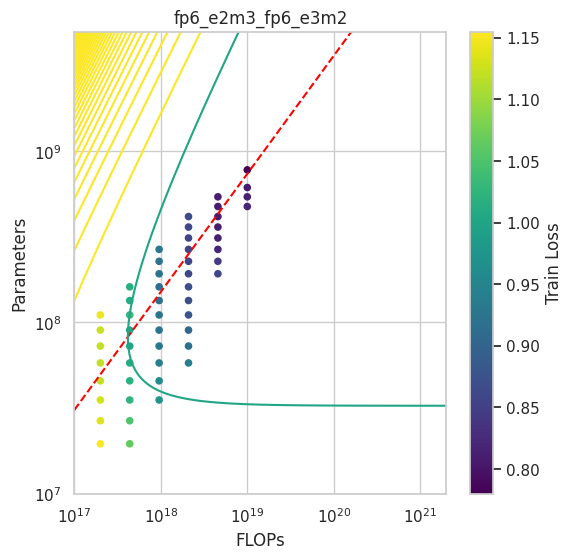

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plot_params_df = pd.DataFrame()
sns.set(style="whitegrid")

# You can define kaplan explicitly if needed
kaplan = False

# Replace with your actual formats
w_format = 'fp6_e2m3'
a_format = 'fp6_e3m2'

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

for loss_name in ["val_loss"]:
    print(f"w_format = {w_format}, a_format = {a_format}")
    try:
        drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")
        
        N, D, L = get_data(drop_df, loss_name)
        params, _ = fit(N, D, L, kaplan=False)
        print(f"Loss: {params['loss']}")

        extrapolation = None
        masks = np.ones(5)
        vals = np.zeros(5)

        # Use the single ax
        plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)

        ax.set_title(f"{w_format}_{a_format}")

        params["kaplan"] = kaplan
        params["w_format"] = w_format
        params["a_format"] = a_format

        params = pd.DataFrame([params.values], columns=params.index)
        plot_params_df = pd.concat([plot_params_df, params])

    except Exception as e:
        print(f"Error: {e}")

# Save and show
plt.savefig(f"figures/curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
plt.show()

In [7]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

KeyError: 'data'